<a href="https://colab.research.google.com/github/gurunathasmb/CNN-Model-/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 !pip install numpy
 !pip install pandas
 !pip install fastai
 !pip install fastcore
 import numpy as np
import pandas as pd
from fastai.vision.all import *

from fastai.vision.widgets import *

In [ ]:
labels = pd.read_csv('/content/drive/MyDrive/New folder/images1.csv')

In [ ]:
labels.head()

,images,gender,cat,sub-cat,types,colour,season,year,usage,product
0,11525,Unisex,Accessories,Bags,Backpacks,Navy Blue,Fall,2010,Casual,Puma Deck Navy Blue Backpack
1,11526,Unisex,Accessories,Bags,Backpacks,Black,Fall,2010,Sports,Puma Big Cat Backpack Black
2,11527,Men,Apparel,Topwear,Jackets,Black,Fall,2010,Sports,Puma Men Ferrari Black Fleece Jacket
3,11528,Men,Apparel,Topwear,Tshirts,Red,Fall,2010,Casual,Ferrari Tee
4,11529,Men,Apparel,Topwear,Jackets,Red,Fall,2010,Sports,Puma Men Ferrari Track Jacket


In [ ]:
labels['season'].value_counts()

,count
season,
Fall,197
Summer,67
Winter,30
Spring,8


In [ ]:
!pip show Pillow

Name: pillow
Version: 11.0.0
Summary: Python Imaging Library (Fork)
Home-page: https://python-pillow.org
Author: 
Author-email: "Jeffrey A. Clark" <aclark@aclark.net>
License: MIT-CMU
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: bokeh, diffusers, dopamine_rl, fastai, imageio, imgaug, matplotlib, scikit-image, sentence-transformers, torchvision, wordcloud


In [ ]:
!pip install --upgrade Pillow

In [ ]:
# Ensure that all images have correct extensions (e.g., .jpg or .png)
labels['images'] = labels['images'].apply(lambda x: x + '.jpg' if not x.endswith('.jpg') else x)


In [ ]:
from PIL import Image
import os

def get_x(r):
    file_path = os.path.join(path, r['image'])
    try:
        # Attempt to open the image to check if it's valid
        with Image.open(file_path) as img:
            img.verify()  # Verify if the image is valid (not corrupted)
        return file_path
    except (FileNotFoundError, OSError) as e:
        print(f"Warning: File not found or not a valid image: {file_path}")
        return None  # Return None if the file is invalid or missing


In [ ]:


from fastai.vision.all import *
import pandas as pd
import os
csv_file = '/content/drive/MyDrive/New folder/filtered_images.csv'
image_path = '/content/drive/MyDrive/New folder/images2'
try:
    df = pd.read_csv(csv_file)
except FileNotFoundError:
    print(f"Error: CSV file '{csv_file}' not found.")
    exit()
except pd.errors.ParserError:
    print(f"Error: Could not parse CSV file '{csv_file}'. Check its format.")
    exit()
required_columns = ['colour', 'images', 'season', 'usage']
if not all(col in df.columns for col in required_columns):
    print(f"Error: CSV file must contain columns: {required_columns}")
    exit()

# Define DataBlock
def get_x(r):
    return os.path.join(image_path, r['images'])

def get_y(r):

    return r['season']


dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_x=get_x,
    get_y=get_y,
    item_tfms=Resize(224),
    batch_tfms=aug_transforms()
)
dls = dblock.dataloaders(df)
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5, base_lr=3e-3)
def predict_season(image_file):
    try:
        img = PILImage.create(image_file)
        pred, idx, probs = learn.predict(img)
        return pred, probs
    except FileNotFoundError:
        print(f"Error: Image file '{image_file}' not found.")
        return None, None


image_file = os.path.join(image_path,'11625.jpg')
season, probabilities = predict_season(image_file)

if season:
    print(f"Predicted season: {season}")
    print(f"Probabilities: {probabilities}")

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:02<00:00, 23.1MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,2.477859,2.448063,0.754717,00:53


epoch,train_loss,valid_loss,error_rate,time
0,2.300947,2.060397,0.660377,00:01
1,2.096165,1.767167,0.622642,00:01
2,1.949621,1.700969,0.547170,00:01
3,1.792938,1.667333,0.566038,00:02
4,1.719850,1.574955,0.584906,00:02


Error: Image file '/content/drive/MyDrive/New folder/images2/11528.jpg' not found.


In [ ]:

image_file = os.path.join(image_path,'12012.jpg')  e
season, probabilities = predict_season(image_file)

if season:
    print(f"Predicted season: {season}")
    print(f"Probabilities: {probabilities}")

Predicted season: Fall
Probabilities: tensor([0.5481, 0.2581, 0.1497, 0.0441])


In [ ]:


from fastai.vision.all import *
from fastai.vision.widgets import *
import os
from PIL import Image
def predict_season(image_file):
    try:
        img = PILImage.create(image_file)
        pred, idx, probs = learn.predict(img)
        return pred, probs
    except FileNotFoundError:
        print(f"Error: Image file '{image_file}' not found.")
        return None, None
uploader = widgets.FileUpload()
uploader

btn_run = widgets.Button(description='Classify')
btn_run

out_pl = widgets.Output()
out_pl.clear_output()

def on_click_classify(change):
    img = PILImage.create(uploader.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred, pred_idx, probs = learn.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]}'
btn_run.on_click(on_click_classify)
lbl_pred = widgets.Label()
lbl_pred

VBox([widgets.Label('Select your image!'),
      uploader, btn_run, out_pl, lbl_pred])

### **from this prediction output take as input recomend more images similar **

In [ ]:
preds,targs = learn.get_preds()

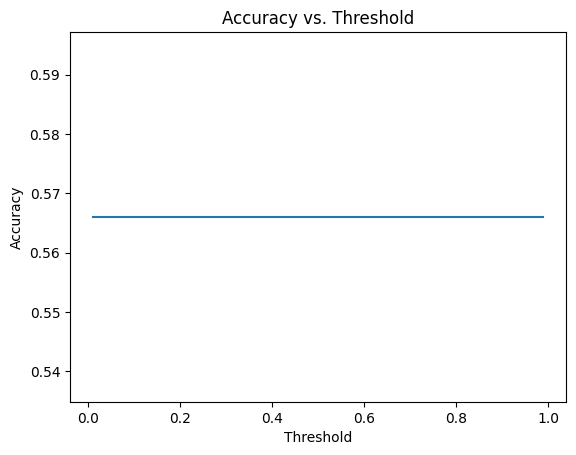

In [ ]:
import torch
import matplotlib.pyplot as plt
from fastai.vision.all import *
xs = torch.linspace(0.01, 0.99, 50)
# Calculate accuracy for each threshold using accuracy function
accs = [accuracy(preds, targs) for i in xs]
plt.plot(xs, accs)
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Threshold")
plt.show()

In [ ]:
learn.export(Path("/content/drive/MyDrive/New folder/export1.pkl"))

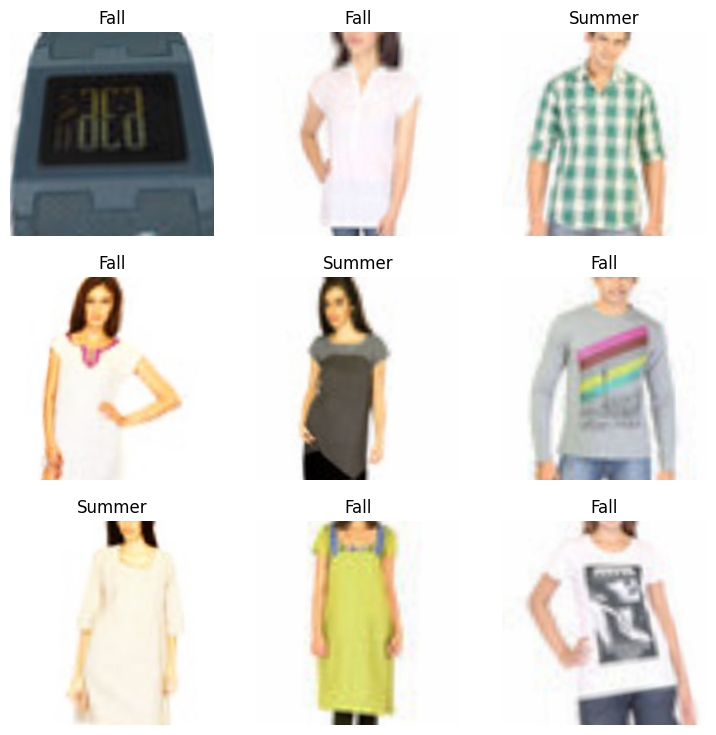

In [ ]:
dls.show_batch(nrows=3, ncols=3)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load the dataset
file_path = '/content/drive/MyDrive/New folder/images1.csv'  # Update the path
data = pd.read_csv(file_path)

# Inspect the dataset
print("Dataset Head:\n", data.head())
print("Columns:\n", data.columns)

# Step 2: Data Preparation
# Specify features and target
feature_columns = ['gender', 'cat', 'types', 'colour', 'season', 'usage']
target_column = 'types'

X = data[feature_columns]
y = data[target_column]

# Encode categorical features and the target column
X = pd.get_dummies(X, columns=feature_columns, drop_first=True)

# Use LabelEncoder for the target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Get unique classes in training data
classes_in_train = sorted(set(y_train))

# Step 3: Train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=200, random_state=42, max_depth=None, min_samples_split=2)
model.fit(X_train, y_train)

# Step 4: Evaluate the Model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Use only the classes present in the training data for the report
class_labels = [label_encoder.inverse_transform([cls])[0] for cls in classes_in_train]
print("Classification Report:\n", classification_report(y_test, y_pred, labels=classes_in_train, target_names=class_labels))

# Step 5: Recommendation Function
def recommend(features):
    """
    Recommend images/products based on the input features.
    :param features: A dictionary of input features
    :return: Recommended class (decoded)
    """
    # Convert the features to the same format as training data
    input_features = pd.DataFrame([features])
    input_features = pd.get_dummies(input_features, columns=feature_columns, drop_first=True)
    # Ensure input has the same columns as training data
    input_features = input_features.reindex(columns=X_train.columns, fill_value=0)

    # Predict the class
    prediction_encoded = model.predict(input_features)[0]
    prediction_decoded = label_encoder.inverse_transform([prediction_encoded])[0]
    return prediction_decoded

# Example Usage: Recommend based on a sample input
sample_input = {
    'gender': 'Men',
    'cat': 'Apparel',
    'sub-cat': 'Topwear',
    'types': 'Jackets',
    'colour': 'Red',
    'season': 'Fall',
    'year': 2010,
    'usage': 'Sports'
}

recommendation = recommend(sample_input)
print("Recommended Product:", recommendation)


Dataset Head:
    images  gender          cat  sub-cat      types     colour season  year  \
0   11525  Unisex  Accessories     Bags  Backpacks  Navy Blue   Fall  2010   
1   11526  Unisex  Accessories     Bags  Backpacks      Black   Fall  2010   
2   11527     Men      Apparel  Topwear    Jackets      Black   Fall  2010   
3   11528     Men      Apparel  Topwear    Tshirts        Red   Fall  2010   
4   11529     Men      Apparel  Topwear    Jackets        Red   Fall  2010   

    usage                               product  
0  Casual          Puma Deck Navy Blue Backpack  
1  Sports           Puma Big Cat Backpack Black  
2  Sports  Puma Men Ferrari Black Fleece Jacket  
3  Casual                           Ferrari Tee  
4  Sports         Puma Men Ferrari Track Jacket  
Columns:
 Index(['images', 'gender', 'cat', 'sub-cat', 'types', 'colour', 'season',
       'year', 'usage', 'product'],
      dtype='object')
Accuracy: 0.9672131147540983
Classification Report:
               precisi

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

Dataset Head:
    images  gender          cat  sub-cat      types     colour season  year  \
0   11525  Unisex  Accessories     Bags  Backpacks  Navy Blue   Fall  2010   
1   11526  Unisex  Accessories     Bags  Backpacks      Black   Fall  2010   
2   11527     Men      Apparel  Topwear    Jackets      Black   Fall  2010   
3   11528     Men      Apparel  Topwear    Tshirts        Red   Fall  2010   
4   11529     Men      Apparel  Topwear    Jackets        Red   Fall  2010   

    usage                               product  
0  Casual          Puma Deck Navy Blue Backpack  
1  Sports           Puma Big Cat Backpack Black  
2  Sports  Puma Men Ferrari Black Fleece Jacket  
3  Casual                           Ferrari Tee  
4  Sports         Puma Men Ferrari Track Jacket  
Columns:
 Index(['images', 'gender', 'cat', 'sub-cat', 'types', 'colour', 'season',
       'year', 'usage', 'product'],
      dtype='object')
Accuracy: 0.8032786885245902
Classification Report:
               precisi

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

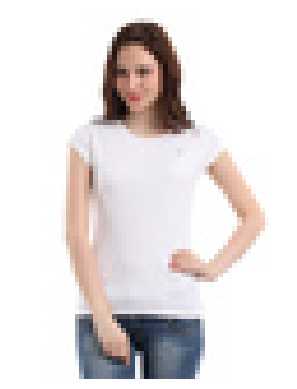

Recommended Product: Backpacks


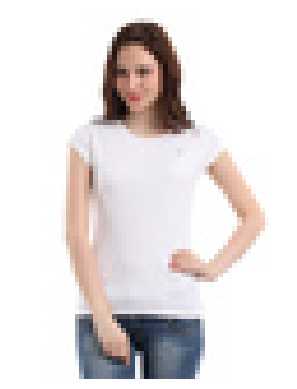

Recommended Product: Backpacks


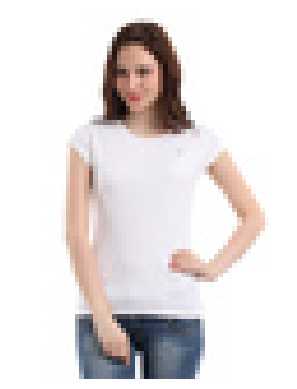

Recommended Product: Backpacks


In [ ]:

import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from PIL import Image
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/New folder/images1.csv'
data = pd.read_csv(file_path)

print("Dataset Head:\n", data.head())
print("Columns:\n", data.columns)
feature_columns = ['gender', 'cat', 'colour', 'season', 'usage']
target_column = 'types'

X = data[feature_columns]
y = data[target_column]
X = pd.get_dummies(X, columns=feature_columns, drop_first=True)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
classes_in_train = sorted(set(y_train))
model = XGBClassifier(objective='multi:softmax', num_class=len(classes_in_train), random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
class_labels = [label_encoder.inverse_transform([cls])[0] for cls in classes_in_train]
print("Classification Report:\n", classification_report(y_test, y_pred, labels=classes_in_train, target_names=class_labels))

def recommend(features, image_folder_path):
    input_features = pd.DataFrame([features])
    input_features = pd.get_dummies(input_features, columns=feature_columns, drop_first=True)
    input_features = input_features.reindex(columns=X_train.columns, fill_value=0)
    prediction_encoded = model.predict(input_features)[0]
    prediction_decoded = label_encoder.inverse_transform([prediction_encoded])[0]
    image_id = data.loc[data[target_column] == prediction_decoded, 'images'].iloc[0]
    image_path = os.path.join(image_folder_path, f'{image_id}.jpg')
    if os.path.exists(image_path):
        img = Image.open(image_path)
        plt.imshow(img)
        plt.axis('off')
        plt.show()
    else:
        print(f"Image for product '{prediction_decoded}' not found.")
    return prediction_decoded

image_folder_path = '/content/drive/MyDrive/New folder/images2'
sample_inputs = [
    {'gender': 'Female', 'cat': 'Apparel', 'sub-cat': 'Topwear', 'colour': 'Yellow', 'season': 'Summer', 'year': 2011, 'usage': 'Formal'},
    {'gender': 'Male', 'cat': 'Footwear', 'sub-cat': 'Sneakers', 'colour': 'Black', 'season': 'Winter', 'year': 2020, 'usage': 'Casual'},
    {'gender': 'Female', 'cat': 'Accessories', 'sub-cat': 'Bags', 'colour': 'Red', 'season': 'Spring', 'year': 2019, 'usage': 'Formal'}
]

for sample_input in sample_inputs:
    recommendation = recommend(sample_input, image_folder_path)
    print("Recommended Product:", recommendation)

Dropdown(description='Gender:', options=('Male', 'Female'), value='Male')

Dropdown(description='Category:', options=('Accessories', 'Apparel', 'Footwear', 'Sporting Goods'), value='Acc…

Dropdown(description='Colour:', options=('Navy Blue', 'Black', 'Red', 'Grey', 'Blue', 'White', 'Orange', 'Purp…

Dropdown(description='Season:', options=('Fall', 'Summer', 'Spring', 'Winter'), value='Fall')

Dropdown(description='Usage:', options=('Casual', 'Sports', 'Travel'), value='Casual')

Button(description='Get Recommendation', style=ButtonStyle())

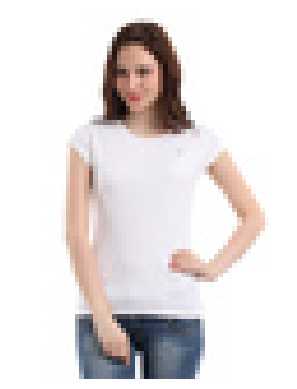

Recommended Product: Backpacks


In [ ]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from PIL import Image
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Load the dataset
file_path = '/content/drive/MyDrive/New folder/images1.csv'
data = pd.read_csv(file_path)

# Prepare the data
feature_columns = ['gender', 'cat', 'colour', 'season', 'usage']
target_column = 'types'

X = data[feature_columns]
y = data[target_column]
X = pd.get_dummies(X, columns=feature_columns, drop_first=True)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train the model
model = XGBClassifier(objective='multi:softmax', num_class=len(set(y_encoded)), random_state=42)
model.fit(X_train, y_train)

# Function to recommend products
def recommend(features, image_folder_path):
    input_features = pd.DataFrame([features])
    input_features = pd.get_dummies(input_features, columns=feature_columns, drop_first=True)
    input_features = input_features.reindex(columns=X_train.columns, fill_value=0)
    prediction_encoded = model.predict(input_features)[0]
    prediction_decoded = label_encoder.inverse_transform([prediction_encoded])[0]
    image_id = data.loc[data[target_column] == prediction_decoded, 'images'].iloc[0]
    image_path = os.path.join(image_folder_path, f'{image_id}.jpg')
    if os.path.exists(image_path):
        img = Image.open(image_path)
        plt.imshow(img)
        plt.axis('off')
        plt.show()
    else:
        print(f"Image for product '{prediction_decoded}' not found.")
    return prediction_decoded

# Create widgets for user input
gender_widget = widgets.Dropdown(options=['Male', 'Female'], description='Gender:')
cat_widget = widgets.Dropdown(options=data['cat'].unique(), description='Category:')
colour_widget = widgets.Dropdown(options=data['colour'].unique(), description='Colour:')
season_widget = widgets.Dropdown(options=data['season'].unique(), description='Season:')
usage_widget = widgets.Dropdown(options=data['usage'].unique(), description='Usage:')

# Function to handle button click
def on_button_click(b):
    features = {
        'gender': gender_widget.value,
        'cat': cat_widget.value,
        'colour': colour_widget.value,
        'season': season_widget.value,
        'usage': usage_widget.value
    }
    recommendation = recommend(features, image_folder_path)
    print("Recommended Product:", recommendation)

# Create a button to trigger the recommendation
button = widgets.Button(description="Get Recommendation")
button.on_click(on_button_click)

# Display the widgets
display(gender_widget, cat_widget, colour_widget, season_widget, usage_widget, button)

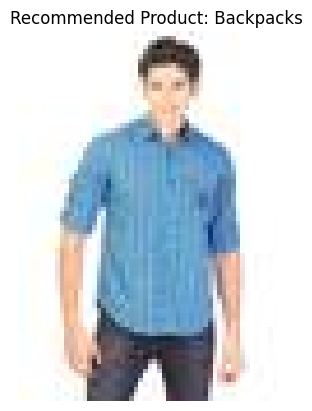

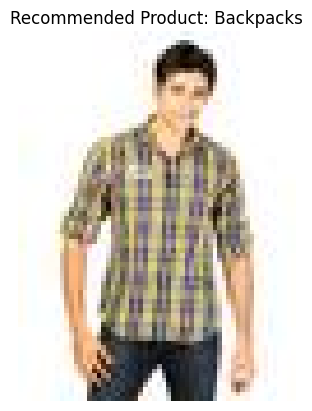

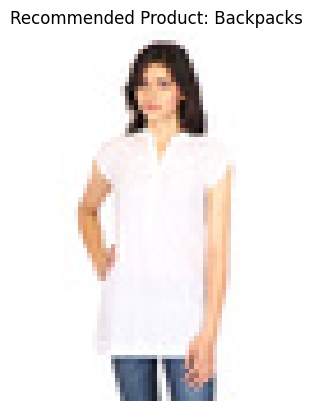

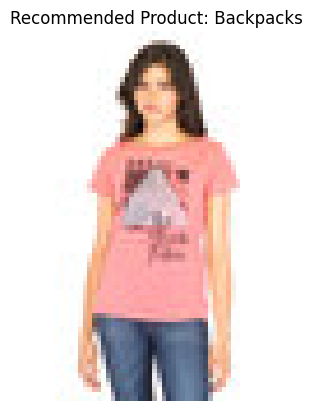

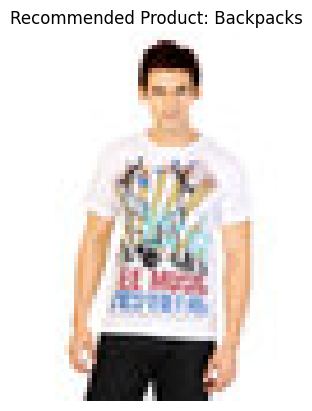

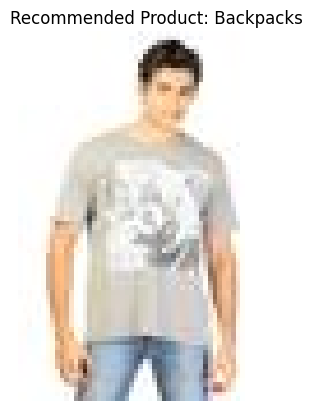

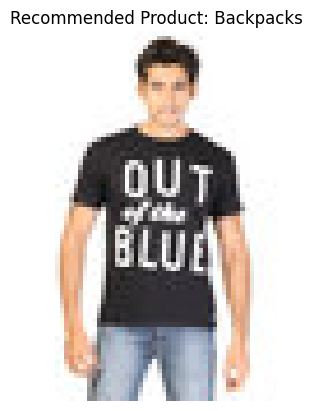

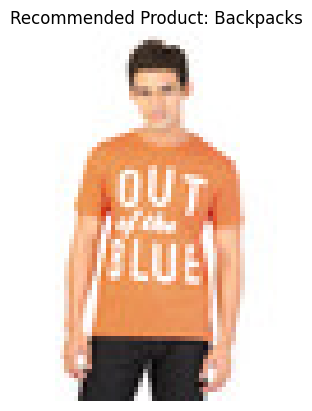

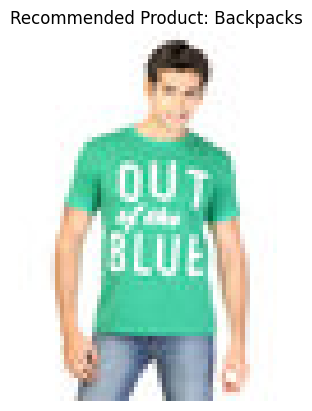

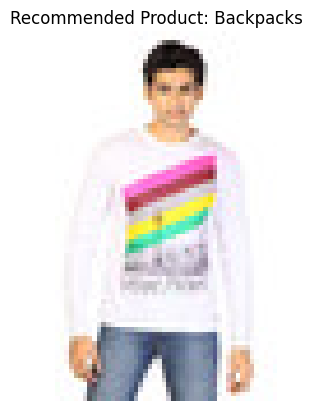

Recommended Product: Backpacks


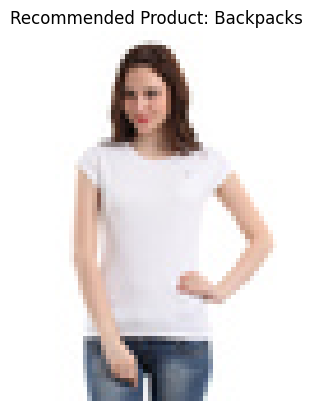

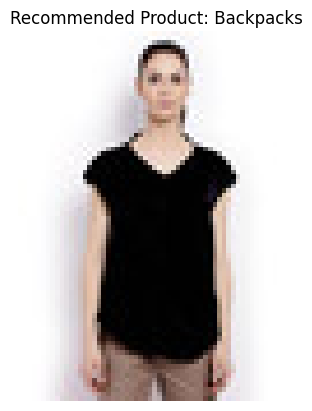

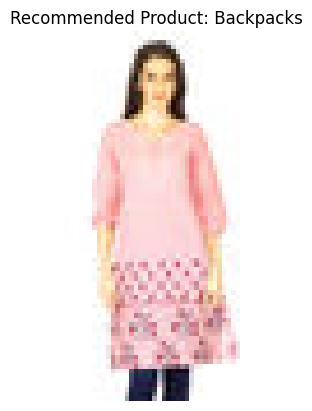

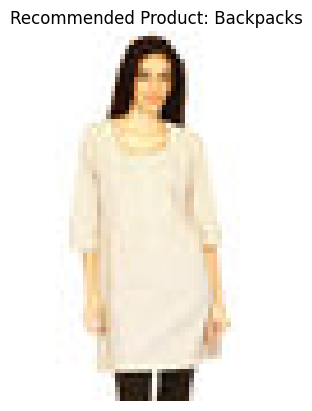

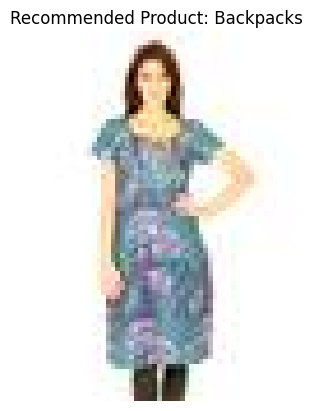

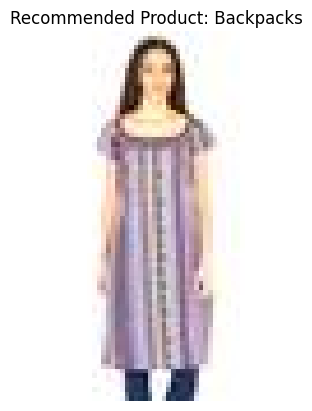

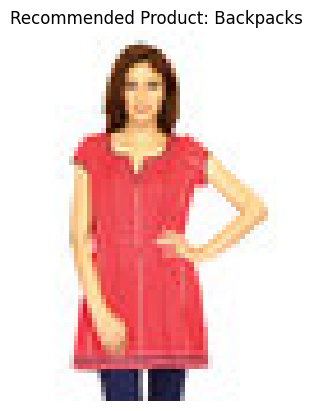

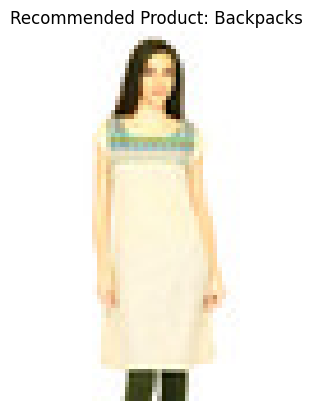

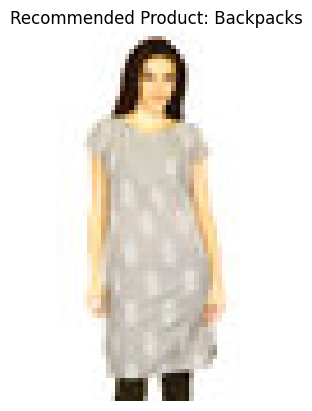

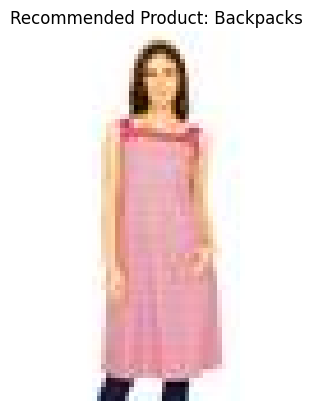

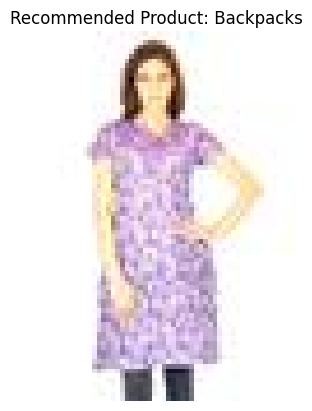

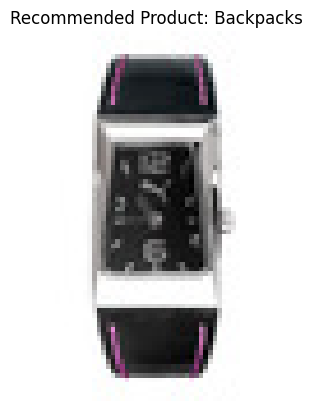

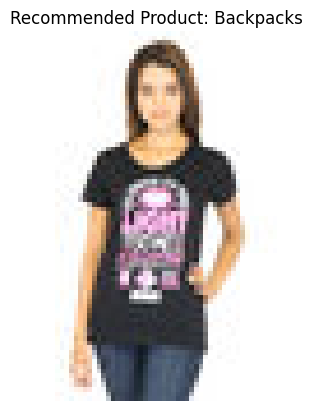

Image for product 'Backpacks' not found.
Image for product 'Backpacks' not found.


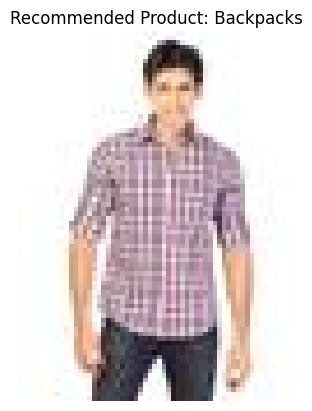

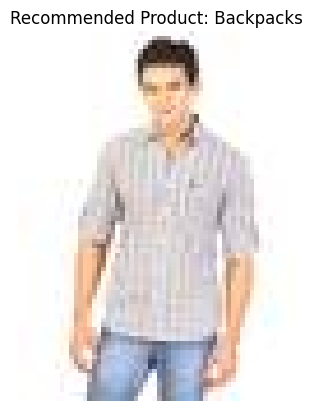

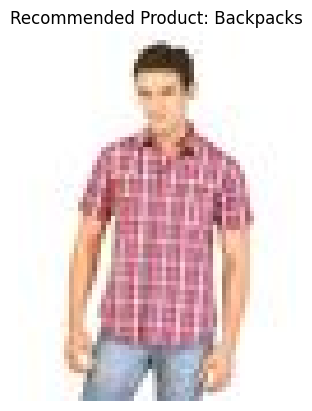

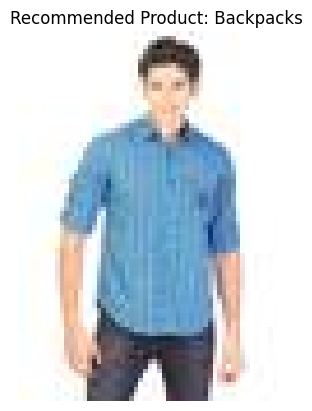

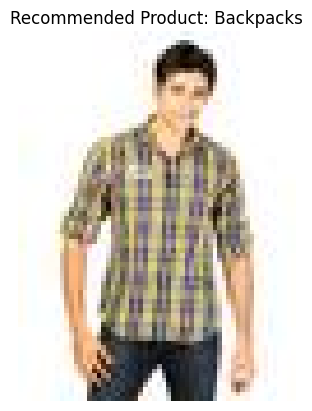

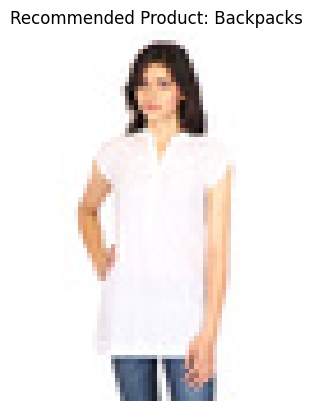

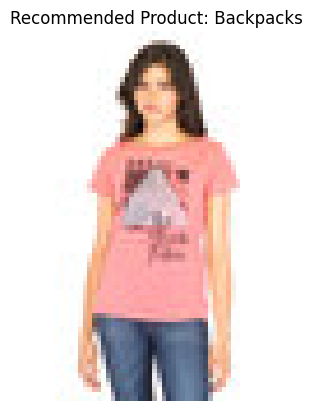

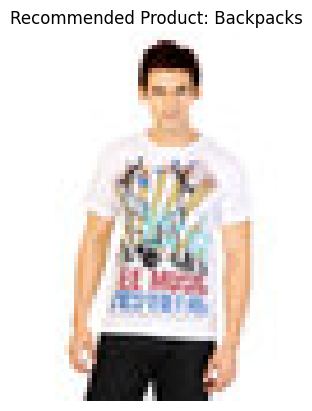

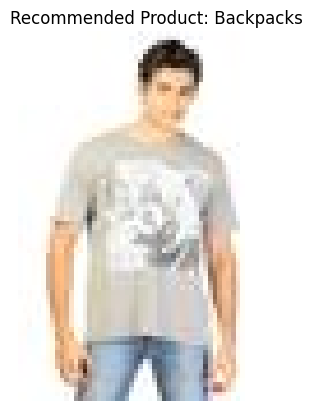

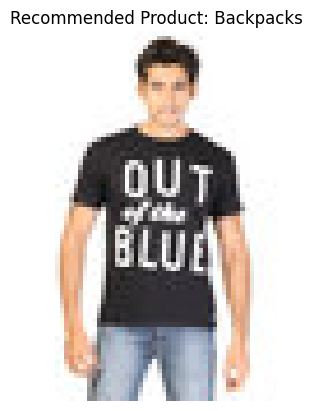

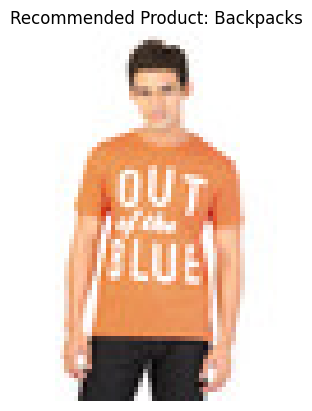

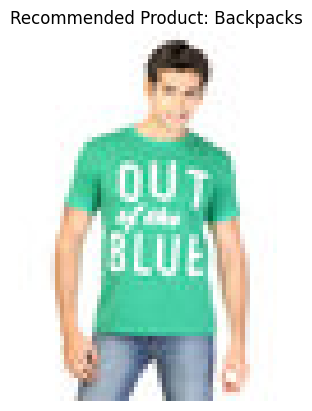

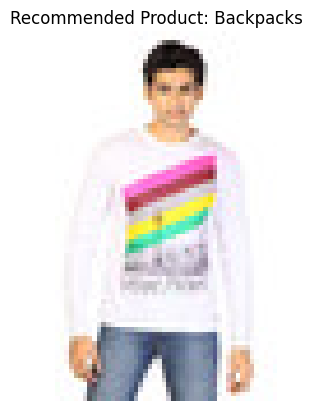

Recommended Product: Backpacks


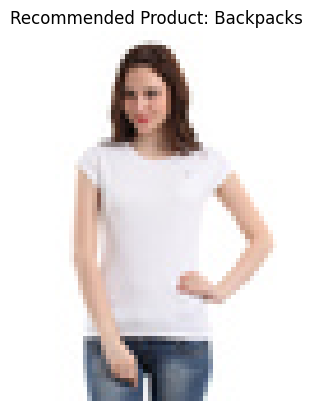

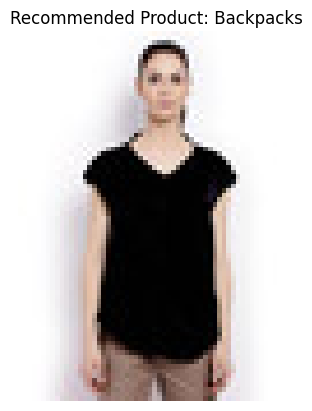

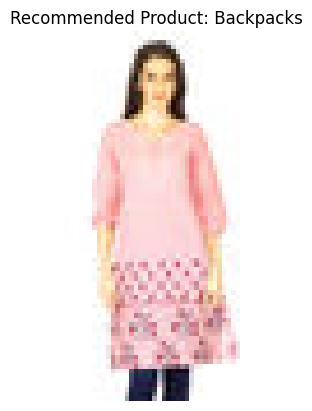

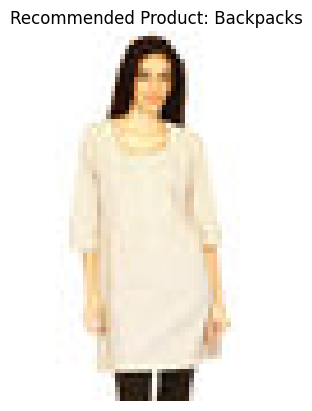

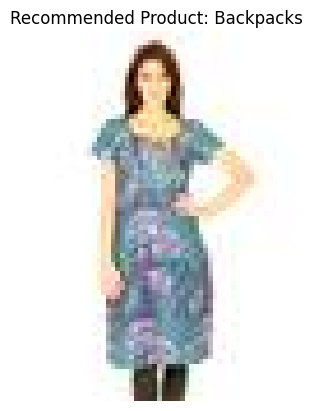

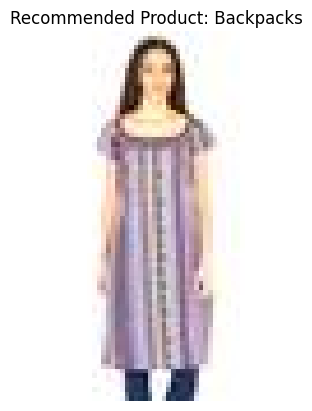

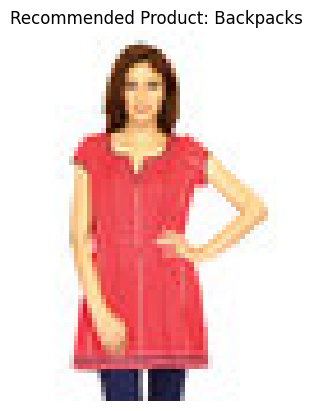

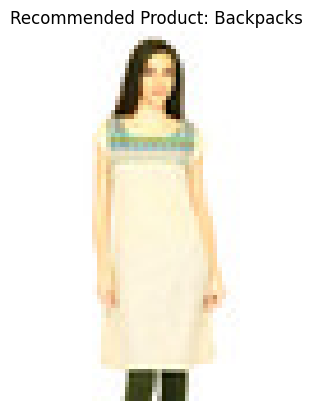

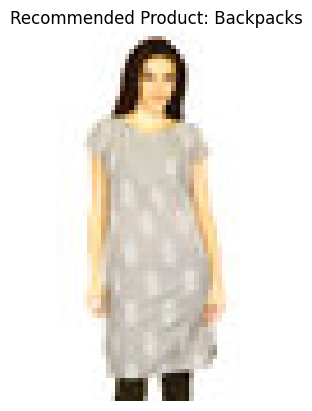

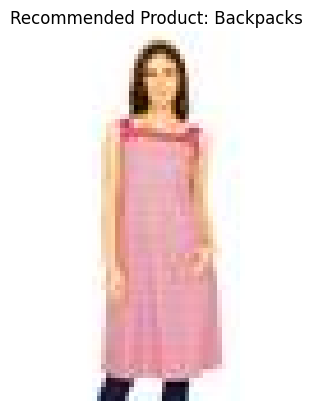

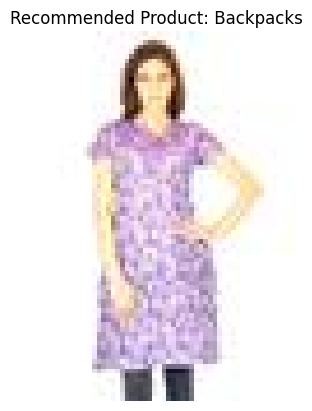

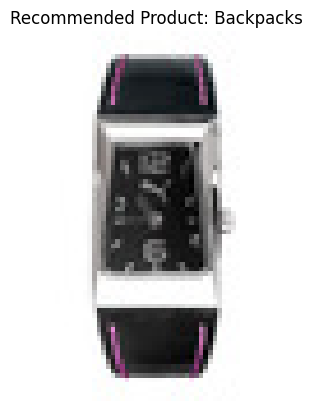

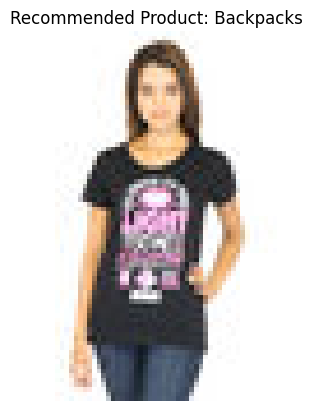

Image for product 'Backpacks' not found.
Image for product 'Backpacks' not found.


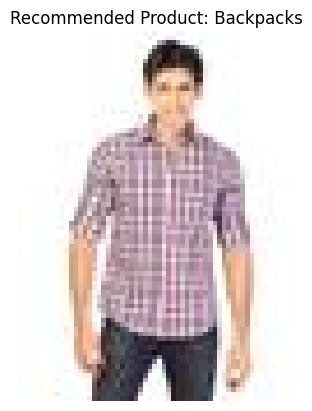

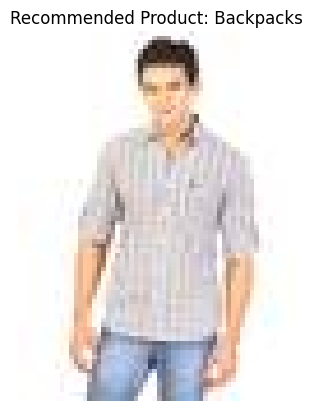

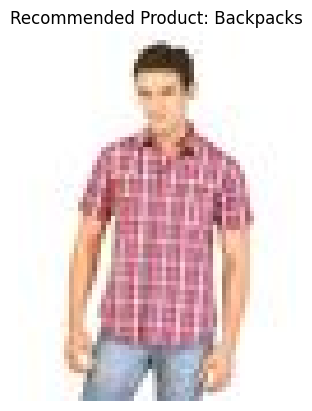

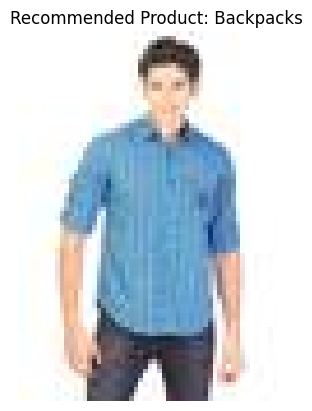

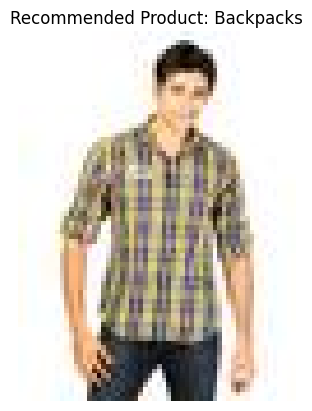

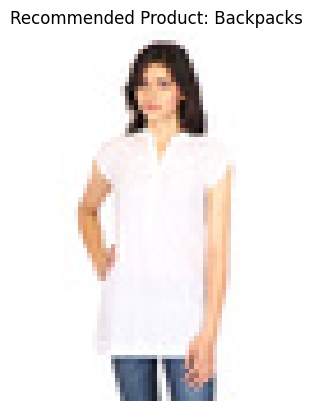

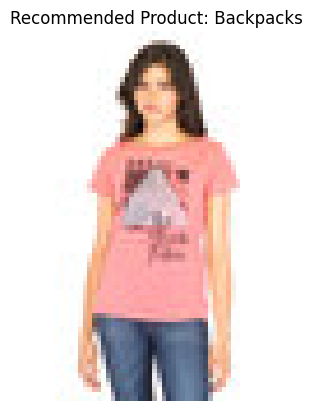

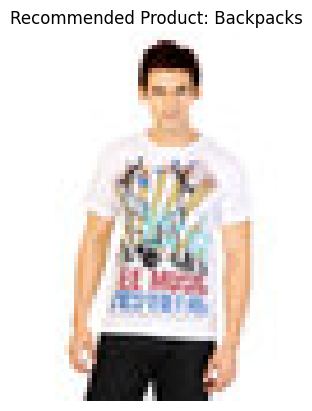

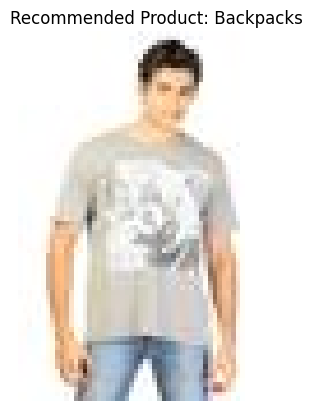

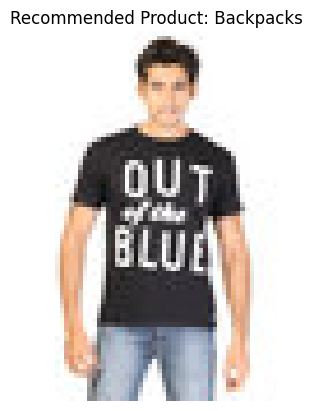

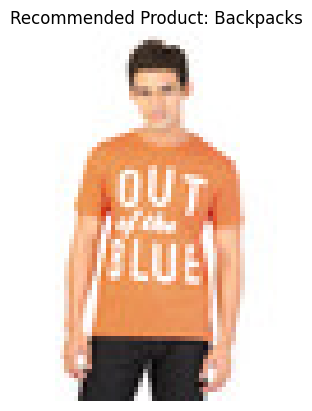

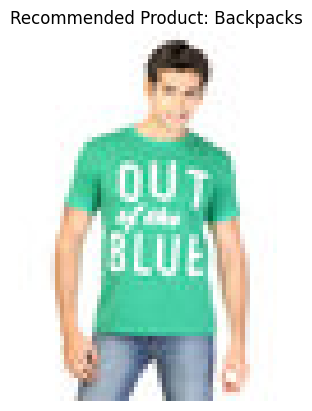

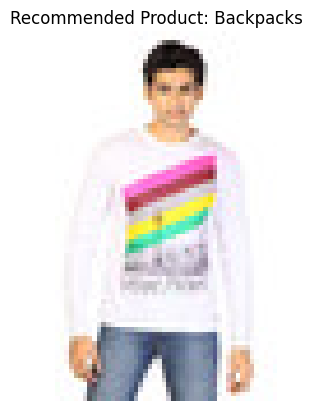

Recommended Product: Backpacks


Dropdown(description='Gender:', options=('Male', 'Female'), value='Male')

Dropdown(description='Category:', options=('Accessories', 'Apparel', 'Footwear', 'Sporting Goods'), value='Acc…

Dropdown(description='Colour:', options=('Navy Blue', 'Black', 'Red', 'Grey', 'Blue', 'White', 'Orange', 'Purp…

Dropdown(description='Season:', options=('Fall', 'Summer', 'Spring', 'Winter'), value='Fall')

Dropdown(description='Usage:', options=('Casual', 'Sports', 'Travel'), value='Casual')

Button(description='Get Recommendation', style=ButtonStyle())

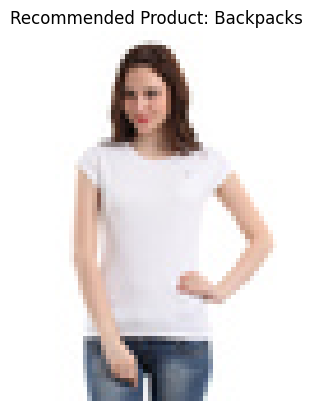

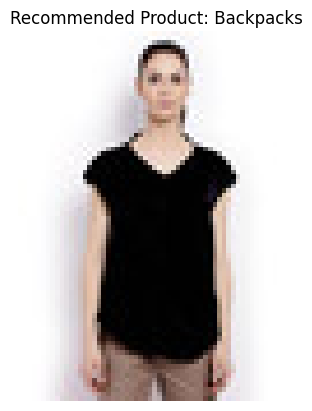

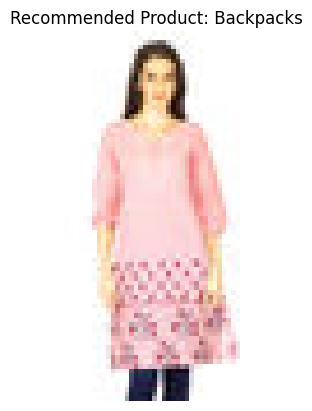

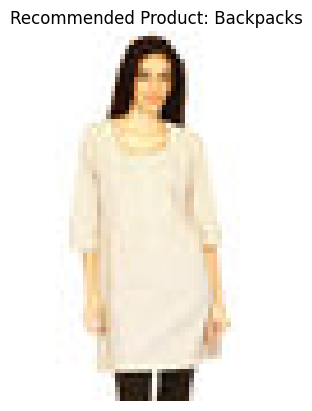

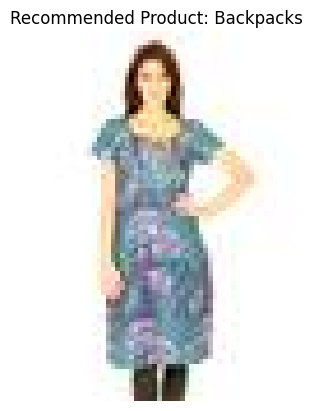

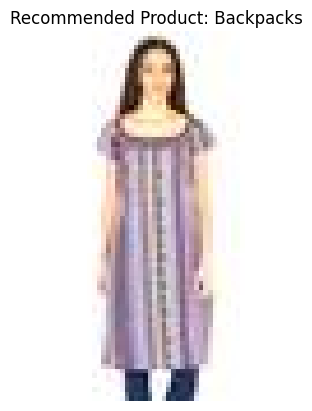

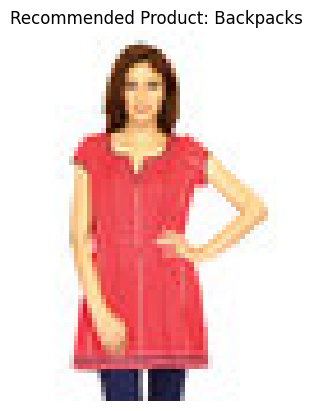

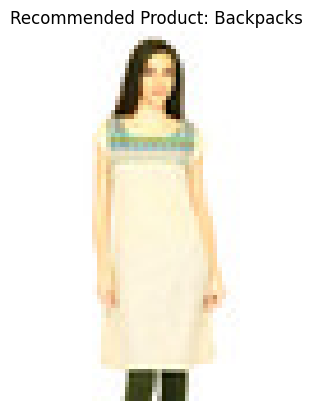

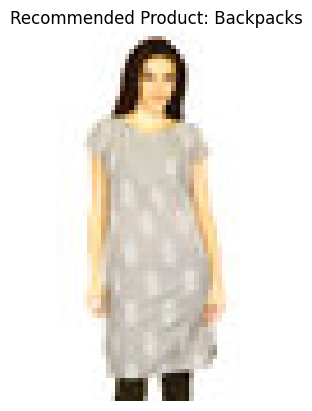

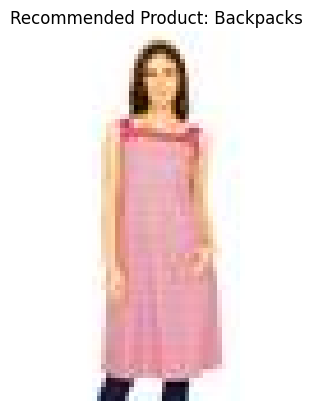

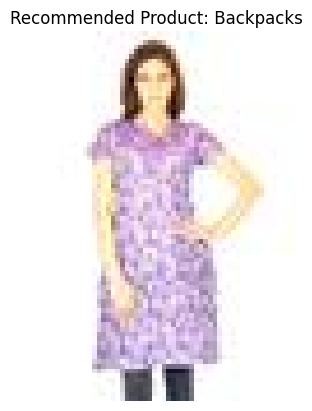

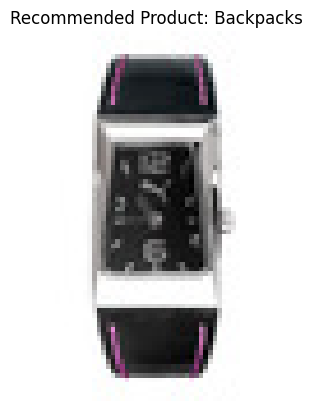

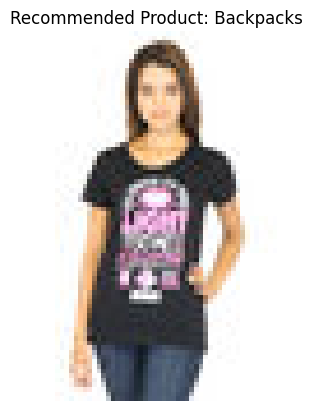

Image for product 'Backpacks' not found.
Image for product 'Backpacks' not found.


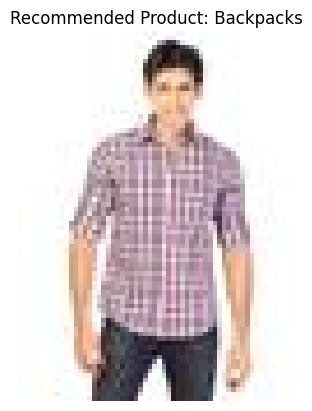

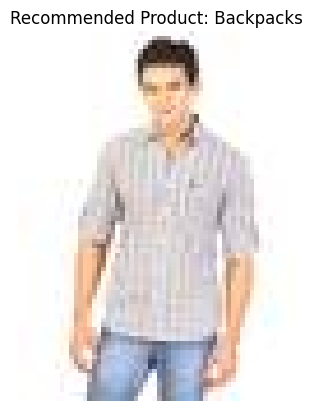

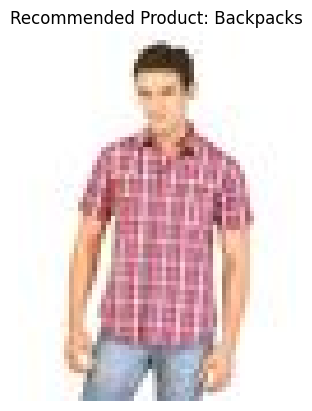

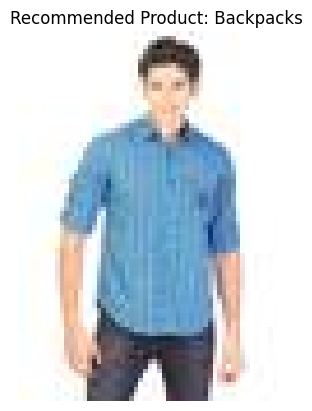

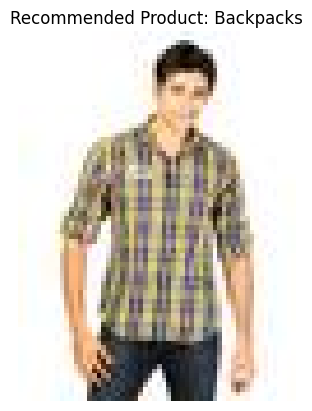

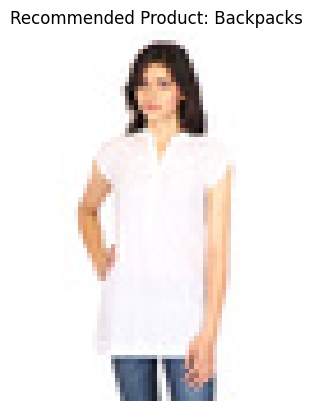

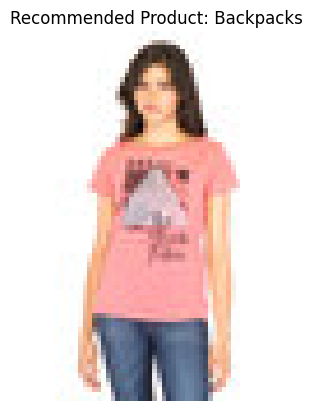

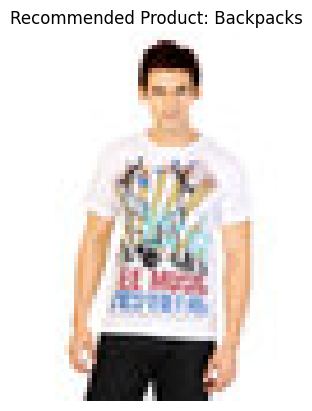

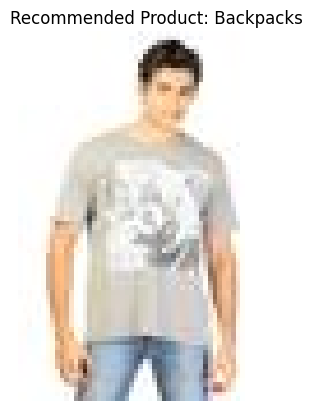

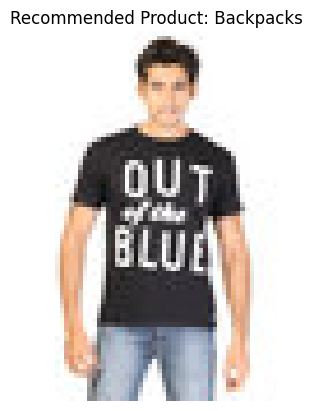

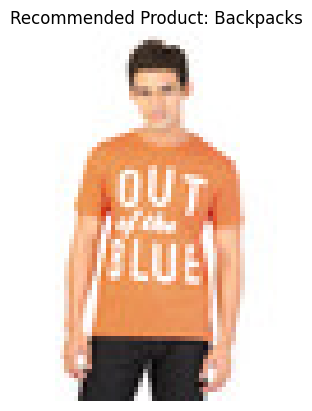

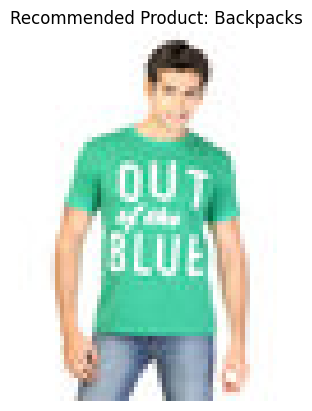

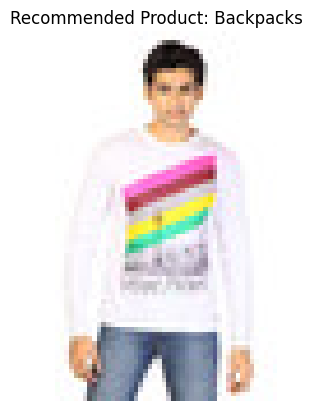

Recommended Product: Backpacks


In [ ]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from PIL import Image
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Load the dataset
file_path = '/content/drive/MyDrive/New folder/images1.csv'
data = pd.read_csv(file_path)

# Prepare the data
feature_columns = ['gender', 'cat', 'colour', 'season', 'usage']
target_column = 'types'

X = data[feature_columns]
y = data[target_column]
X = pd.get_dummies(X, columns=feature_columns, drop_first=True)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train the model
model = XGBClassifier(objective='multi:softmax', num_class=len(set(y_encoded)), random_state=42)
model.fit(X_train, y_train)

# Function to recommend products
def recommend(features, image_folder_path):
    input_features = pd.DataFrame([features])
    input_features = pd.get_dummies(input_features, columns=feature_columns, drop_first=True)
    input_features = input_features.reindex(columns=X_train.columns, fill_value=0)
    prediction_encoded = model.predict(input_features)[0]
    prediction_decoded = label_encoder.inverse_transform([prediction_encoded])[0]

    # Get all images for the predicted category
    image_ids = data.loc[data[target_column] == prediction_decoded, 'images']

    if not image_ids.empty:
        for image_id in image_ids:
            image_path = os.path.join(image_folder_path, f'{image_id}.jpg')
            if os.path.exists(image_path):
                img = Image.open(image_path)
                plt.imshow(img)
                plt.axis('off')
                plt.title(f"Recommended Product: {prediction_decoded}")
                plt.show()
            else:
                print(f"Image for product '{prediction_decoded}' not found.")
    else:
        print(f"No images found for product '{prediction_decoded}'.")

    return prediction_decoded

# Create widgets for user input
gender_widget = widgets.Dropdown(options=['Male', 'Female'], description='Gender:')
cat_widget = widgets.Dropdown(options=data['cat'].unique(), description='Category:')
colour_widget = widgets.Dropdown(options=data['colour'].unique(), description='Colour:')
season_widget = widgets.Dropdown(options=data['season'].unique(), description='Season:')
usage_widget = widgets.Dropdown(options=data['usage'].unique(), description='Usage:')

# Function to handle button click
def on_button_click(b):
    features = {
        'gender': gender_widget.value,
        'cat': cat_widget.value,
        'colour': colour_widget.value,
        'season': season_widget.value,
        'usage': usage_widget.value
    }
    recommendation = recommend(features, image_folder_path)
    print("Recommended Product:", recommendation)

# Create a button to trigger the recommendation
button = widgets.Button(description="Get Recommendation")
button.on_click(on_button_click)

# Display the widgets
display(gender_widget, cat_widget, colour_widget, season_widget, usage_widget, button)